In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import numpy as np

### Read and Transform the data

In [4]:
data = pd.read_csv(r"D:\Capstone\Data\Train.csv")

In [5]:
data.head(5)

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


In [6]:
data.shape

(26068, 6)

In [7]:
data['year'] = data['season'].apply(lambda x: x[2:])
data['season'] = data['season'].apply(lambda x: x[0:2])
data['is_DR_damage'] = data['damage'].apply(lambda x: 'DR' if x=='DR' else 'Non-DR')

In [8]:
data.head()

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR,2020,Non-DR
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR,2021,Non-DR
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR,2020,Non-DR
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR,2021,Non-DR


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            26068 non-null  object
 1   filename      26068 non-null  object
 2   growth_stage  26068 non-null  object
 3   damage        26068 non-null  object
 4   extent        26068 non-null  int64 
 5   season        26068 non-null  object
 6   year          26068 non-null  object
 7   is_DR_damage  26068 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [10]:
data[['growth_stage','damage','season','year']].astype('category').describe()

,growth_stage,damage,season,year
count,26068,26068,26068,26068
unique,4,8,2,2
top,V,G,SR,2021
freq,10015,11623,16090,17872


### Data Cleaning

In [11]:
# Drop Duplicates
data.drop_duplicates(inplace=True)

In [12]:
# Check for Missing Data
for column in data.columns:
    print(f"{column: <15}:{data[column].isnull().sum()}")

ID             :0
filename       :0
growth_stage   :0
damage         :0
extent         :0
season         :0
year           :0
is_DR_damage   :0


### Exploratory Data Analysis

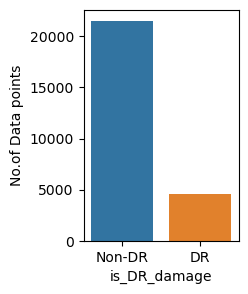

In [13]:
plt.figure(figsize=(2,3))
sns.countplot(x='is_DR_damage',data=data)
plt.ylabel("No.of Data points")
plt.show()

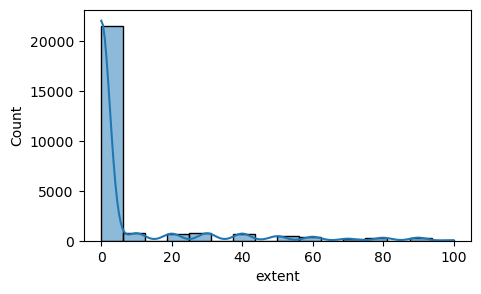

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(x='extent',data=data, kde=True)
plt.show()

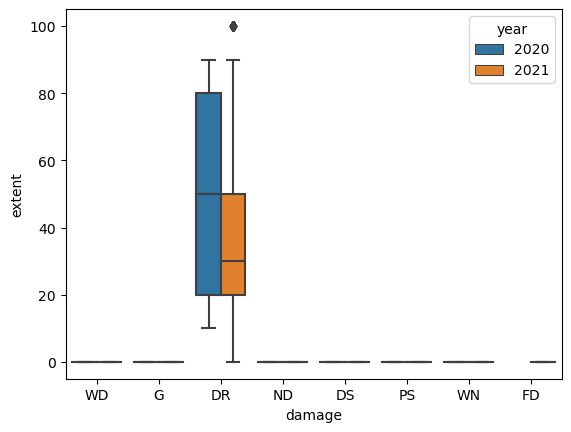

In [15]:
#plt.figure(figsize=(2,3))
sns.boxplot(x='damage',y='extent',data = data, hue='year')
plt.show()

In [16]:
data_dr = data[data['damage']=='DR']
data_dr.head()

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,M,DR,40,LR,2021,DR
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,F,DR,60,LR,2021,DR
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,M,DR,20,SR,2020,DR
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,M,DR,50,SR,2020,DR


In [17]:
data_dr.shape

(4516, 8)

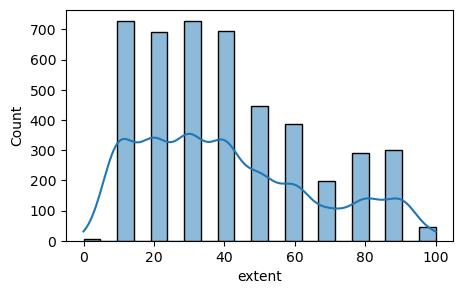

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(x='extent',data=data_dr, kde=True)
plt.show()

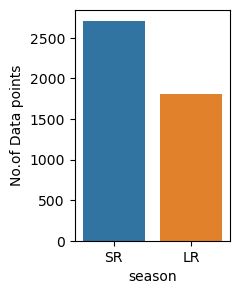

In [19]:
# Distribution of images across seasons and year

plt.figure(figsize=(2,3))
sns.countplot(x='season',data=data_dr)
plt.ylabel("No.of Data points")
plt.show()

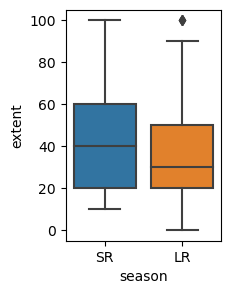

In [20]:
plt.figure(figsize=(2,3))
sns.boxplot(x='season',y='extent',data = data_dr)
plt.show()

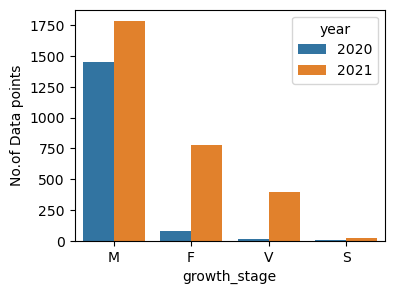

In [21]:
# Distribution of images across growth stage and year

plt.figure(figsize=(4,3))
sns.countplot(x='growth_stage',data=data_dr, hue='year')
plt.ylabel("No.of Data points")
plt.show()

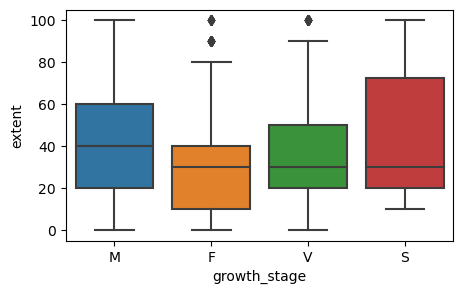

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(x='growth_stage',y='extent',data = data_dr)
plt.show()

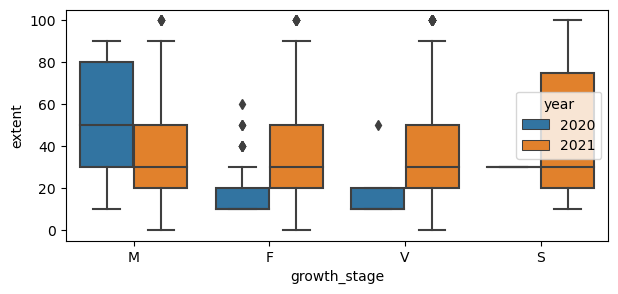

In [23]:
plt.figure(figsize=(7,3))
sns.boxplot(x='growth_stage',y='extent',data = data_dr, hue='year')
plt.show()

### Image Preprocessing

In [24]:
#Check for corrupted image

data_img = data.copy(deep=True)


data_img['is_corrupted'] = ''
data_img.head()    

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage,is_corrupted
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR,2020,Non-DR,
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR,2021,Non-DR,
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR,2020,Non-DR,
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR,
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR,2021,Non-DR,


In [25]:
data_img.reset_index(inplace = True)
data_img.drop('index',axis=1,inplace=True)

In [26]:
data_img.head()

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage,is_corrupted
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR,2020,Non-DR,
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR,2021,Non-DR,
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR,2020,Non-DR,
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR,
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR,2021,Non-DR,


In [29]:
folder_path = "D:\Capstone\Data\data_train"


def isCorruptedImage(fname):
    fpath = os.path.join(folder_path, fname)
    try:
        fobj = open(fpath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
        fobj.close()
    if not is_jfif:
        return True
    return False
            

In [30]:
isCorruptedImage('L341F00167C01S00324Rp14178.jpg')

False

In [31]:
data_img['is_corrupted'] = data_img['filename'].apply(isCorruptedImage)
data_img['is_corrupted'].sum()

0

In [32]:
# No corrupted images found

### Loading the Data using torchvision

In [33]:
#Loading the image file and label mapping data
image_mapping_data = pd.read_csv(r"D:\Capstone\Data\ImageLabelMapping.csv")
image_mapping_data.head()

,filename,Label
0,L427F01330C01S03961Rp02052.jpg,0
1,L1083F00930C39S12674Ip.jpg,0
2,24_initial_1_1463_1463.JPG,0
3,L341F00167C01S00324Rp14178.jpg,1
4,L1084F02394C39S13931Ip.jpg,0


In [36]:
#splitting the data into training and validation sets with stratification  
from sklearn.model_selection import train_test_split

X = image_mapping_data['filename']
y = image_mapping_data['Label']
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size = 0.2, stratify=y)

In [37]:
#verifying if the stratification worked
from collections import Counter

print(Counter(y_train))
print(Counter(y_val))

Counter({0: 17241, 1: 3613})
Counter({0: 4311, 1: 903})


In [38]:
X_train = list(X_train)
y_train = list(y_train)
X_val = list(X_val)
y_val = list(y_val)

In [45]:
#creating the custom Dataset class in pytorch.
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import cv2

class ImageDataset(Dataset):
    def __init__(self, img_dir, img_files, img_labels, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.img_files = img_files
        self.img_labels = img_labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (256, 256))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [46]:
from torchvision import transforms
train_transform = transforms.Compose([transforms.ToTensor()])
val_transform = transforms.Compose([transforms.ToTensor()])

In [47]:
img_dir = "D:\Capstone\Data\data_train"
train_set = ImageDataset(img_dir, X_train, y_train, transform = train_transform)
val_set = ImageDataset(img_dir, X_val, y_val, transform = val_transform)

print("Training data size",train_set.__len__())
print("Validation data size",val_set.__len__())

Training data size 20854
Validation data size 5214


In [48]:
BATCH_SIZE = 10

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

tensor([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])


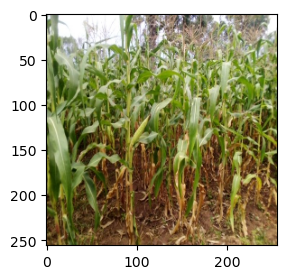

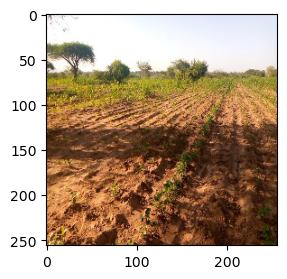

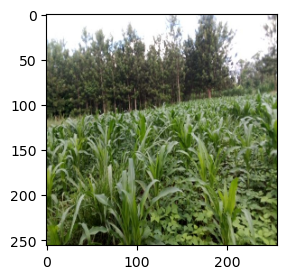

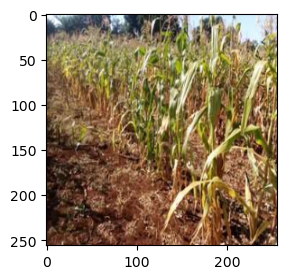

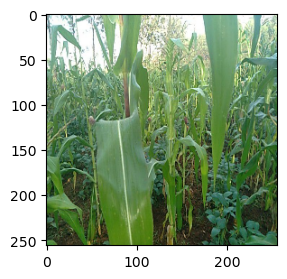

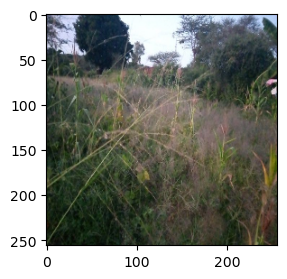

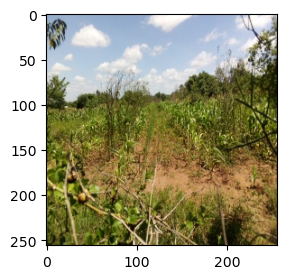

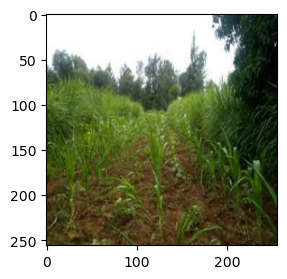

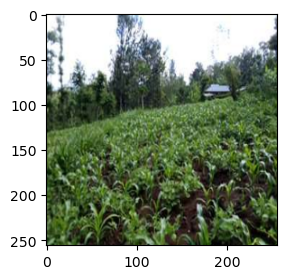

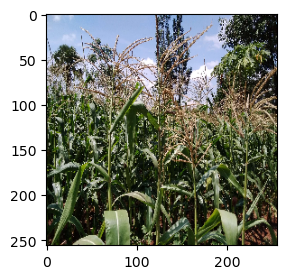

In [49]:
img, label = next(iter(train_loader))

# 0-NonDR, 1-DR 
print(label)

for i in img:
    plt.figure(figsize=(3,3))
    npimg = np.array(i)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


### Building the model

In [52]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch

class CNNImg(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(5,5), stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
        self.drop2 = nn.Dropout(0.2)
        
        self.conv3 = nn.Conv2d(64, 64, kernel_size=(5,5), stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=(3,3), stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=(2, 2))
        self.drop4 = nn.Dropout(0.2)
        
        self.conv5 = nn.Conv2d(64, 64, kernel_size=(3,3), stride=1, padding=1)
        self.pool5 = nn.MaxPool2d(kernel_size=(2, 2))
        self.drop5 = nn.Dropout(0.2)
        
        self.flat5 = nn.Flatten()
 
        self.fc6 = nn.Linear(61504, 512)
        self.fc7 = nn.Linear(512, 32)
        self.fc8 = nn.Linear(32, 1)
 
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.drop2(x)
        
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = self.drop4(x)
        
        x = F.relu(self.conv5(x))
        x = self.pool5(x)
        x = self.drop5(x)
        
        x = self.flat5(x)
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.sigmoid(self.fc8(x))
        
        return x

In [53]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [54]:
from torchsummary import summary

custom_model = CNNImg()
custom_model.to(device)
summary(custom_model,(3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 254, 254]           2,432
            Conv2d-2         [-1, 64, 254, 254]          18,496
         MaxPool2d-3         [-1, 64, 127, 127]               0
           Dropout-4         [-1, 64, 127, 127]               0
            Conv2d-5         [-1, 64, 125, 125]         102,464
            Conv2d-6         [-1, 64, 125, 125]          36,928
         MaxPool2d-7           [-1, 64, 62, 62]               0
           Dropout-8           [-1, 64, 62, 62]               0
            Conv2d-9           [-1, 64, 62, 62]          36,928
        MaxPool2d-10           [-1, 64, 31, 31]               0
          Dropout-11           [-1, 64, 31, 31]               0
          Flatten-12                [-1, 61504]               0
           Linear-13                  [-1, 512]      31,490,560
           Linear-14                   

In [55]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(custom_model.parameters(), lr=0.001, momentum=0.9)

### Training Loop

In [56]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = custom_model(inputs)

        # Compute the loss and its gradients
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs, labels.unsqueeze(1))
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [57]:
%%time
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

writer = SummaryWriter(r"D:\Capstone\runs\img_classifier_{}".format(timestamp))
epoch_number = 0

EPOCHS = 10

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print(f'EPOCH {epoch_number + 1}:')

    # Make sure gradient tracking is on, and do a pass over the data
    custom_model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    custom_model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            vinputs, vlabels = vinputs.to(device), vlabels.to(device)
            vlabels = vlabels.to(torch.float32)
            voutputs = custom_model(vinputs)
            vloss = loss_fn(voutputs, vlabels.unsqueeze(1))
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(custom_model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 0.4750001933723688
  batch 2000 loss: 0.46530952376127244
LOSS train 0.46530952376127244 valid 0.44799700379371643
EPOCH 2:
  batch 1000 loss: 0.41854205657541754
  batch 2000 loss: 0.4064776329174638
LOSS train 0.4064776329174638 valid 0.4283595085144043
EPOCH 3:
  batch 1000 loss: 0.39492344826087356
  batch 2000 loss: 0.40128298696130515
LOSS train 0.40128298696130515 valid 0.4006582200527191
EPOCH 4:
  batch 1000 loss: 0.4012140989229083
  batch 2000 loss: 0.38911619018390775
LOSS train 0.38911619018390775 valid 0.39251255989074707
EPOCH 5:
  batch 1000 loss: 0.39587791039049625
  batch 2000 loss: 0.3845227410439402
LOSS train 0.3845227410439402 valid 0.40192705392837524
EPOCH 6:
  batch 1000 loss: 0.38452648025006053
  batch 2000 loss: 0.393043549541384
LOSS train 0.393043549541384 valid 0.38706880807876587
EPOCH 7:
  batch 1000 loss: 0.3778568730428815
  batch 2000 loss: 0.38356951346248386
LOSS train 0.38356951346248386 valid 0.3703295886516571
EPOCH 

### Evaluating the model

### Creating feature extractor

In [58]:
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor

In [59]:
train_nodes, eval_nodes = get_graph_node_names(CNNImg())

C:\Users\bduser\anaconda3\Lib\site-packages\torch\overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
C:\Users\bduser\anaconda3\Lib\site-packages\torch\overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
C:\Users\bduser\anaconda3\Lib\site-packages\torch\overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
C:\Users\bduser\anaconda3\Lib\site-packages\torch\overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


In [73]:
feature_extractor = create_feature_extractor(custom_model, {'flat5':'feature_output'})
feature_extractor

CNNImg(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout(p=0.2, inplace=False)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (drop5): Dropout(p=0.2, inplace=False)
  (flat5): Flatten(start_dim=1, end_dim=-1)
)